In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import math

# Reading the dataset (Tennis-dataset)
data = pd.read_csv('/kaggle/input/playtennis/PlayTennis.csv')

In [2]:
def highlight(cell_value):
    '''
    Highlight yes / no values in the dataframe
    '''
    color_1 = 'background-color: pink;'
    color_2 = 'background-color: lightgreen;'
    
    if cell_value == 'no':
        return color_1
    elif cell_value == 'yes':
        return color_2  

data.style.applymap(highlight)\
    .set_properties(subset=data.columns, **{'width': '100px'})\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), ('border', '1px solid gray'),
                                                    ('font-weight', 'bold')]},
     {'selector': 'tr:hover', 'props': [('background-color', 'white'), ('border', '1.5px solid black')]}])

In [3]:
def find_entropy(data):
    """
    Returns the entropy of the class or features
    formula: - ∑ P(X)logP(X)
    """
    entropy = 0
    for i in range(data.nunique()):
        x = data.value_counts()[i]/data.shape[0] 
        entropy += (- x * math.log(x,2))
    return round(entropy,3)



def information_gain(data, data_):
    """
    Returns the information gain of the features
    """
    info = 0
    for i in range(data_.nunique()):
        df = data[data_ == data_.unique()[i]]
        w_avg = df.shape[0]/data.shape[0]
        entropy = find_entropy(df.play)
        x = w_avg * entropy
        info += x
    ig = find_entropy(data.play) - info
    return round(ig, 3)   



def entropy_and_infogain(datax, feature):
    """
    Grouping features with the same class and computing their 
    entropy and information gain for splitting
    """
    for i in range(data[feature].nunique()):
        df = datax[datax[feature]==data[feature].unique()[i]]
        if df.shape[0] < 1:
            continue
        
        display(df[[feature, 'play']].style.applymap(highlight)\
                .set_properties(subset=[feature, 'play'], **{'width': '80px'})\
                .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), 
                                                                ('border', '1px solid gray'), 
                                                                ('font-weight', 'bold')]},
                                   {'selector': 'td', 'props': [('border', '1px solid gray')]},
                                   {'selector': 'tr:hover', 'props': [('background-color', 'white'), 
                                                                      ('border', '1.5px solid black')]}]))
        
        print(f'Entropy of {feature} - {data[feature].unique()[i]} = {find_entropy(df.play)}')
    print(f'Information Gain for {feature} = {information_gain(datax, datax[feature])}')

**Computing entropy for the entire dataset**

In [4]:
print(f'Entropy of the entire dataset: {find_entropy(data.play)}')

**Outlook**

In [5]:
entropy_and_infogain(data, 'outlook')

**Temp**

In [6]:
entropy_and_infogain(data, 'temp')

**Humidity**

In [7]:
entropy_and_infogain(data, 'humidity')

**Windy**

In [8]:
entropy_and_infogain(data, 'windy')

**Repeat until we run out of all features, or the decision tree has all leaf nodes**

### **Outlook - Sunny**

In [9]:
sunny = data[data['outlook'] == 'sunny']
sunny.style.applymap(highlight)\
    .set_properties(subset=data.columns, **{'width': '100px'})\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), ('border', '1px solid gray'),
                                                    ('font-weight', 'bold')]},
     {'selector': 'tr:hover', 'props': [('background-color', 'white'), ('border', '1.5px solid black')]}])

In [10]:
print(f'Entropy of the Sunny dataset: {find_entropy(sunny.play)}')

**Calculating the Information gain for each feature**

**Temp**

In [11]:
entropy_and_infogain(sunny, 'temp')

**Humidity**

In [12]:
entropy_and_infogain(sunny, 'humidity')

**Windy**

In [13]:
entropy_and_infogain(sunny, 'windy')

### **Outlook - Rainy**

In [14]:
rainy = data[data['outlook'] == 'rainy'] 
rainy.style.applymap(highlight)\
    .set_properties(subset=data.columns, **{'width': '100px'})\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), ('border', '1px solid gray'),
                                                    ('font-weight', 'bold')]},
     {'selector': 'tr:hover', 'props': [('background-color', 'white'), ('border', '1.5px solid black')]}])

In [15]:
print(f'Entropy of the Rainy dataset: {find_entropy(rainy.play)}')

**Calculating the Information gain for each feature**

**Temp**

In [16]:
entropy_and_infogain(rainy, 'temp')

**Humidity**

In [17]:
entropy_and_infogain(rainy, 'humidity')

**Windy**

In [18]:
entropy_and_infogain(rainy, 'windy')

**Making a decision tree node using the feature which has the maximum Information Gain.**

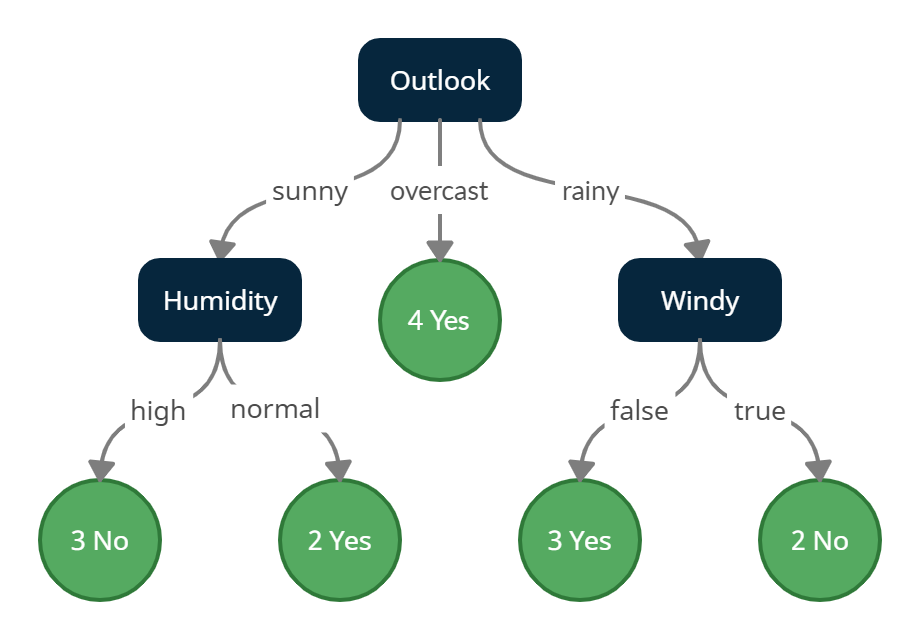